# Softmax

Es la activación usada en la capa de salida de clasificación multiclase (cuando hay más de dos clases posibles).

La Softmax convierte un vector de salidas lineales (por ejemplo, tres neuronas de salida) en probabilidades normalizadas que suman 1:

Para cada muestra, se le asignan tantas probabilidades como clases tenemos y estas suman 1 (100) por ejemplo para 3 clases

20% de que sea de clase 1

50% de que sea de clase 2

30€ de que sea de clase 2

In [2]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# === Datos de entrada: 3 muestras, 2 características ===
#fila = muestra & columna = característica
X = torch.tensor([
    [2.0, 1.0],
    [5.0, 1.0],
    [1.0, 3.0]
], device=device)

# === Pesos y bias para 3 clases (3 neuronas de salida) ===
# Cada fila corresponde a una característica de entrada (x₁, x₂)
# Cada columna corresponde a una clase (neurona de salida)
W = torch.tensor([
    [2.0, -1.0,  0.5],
    [1.0,  3.0, -2.0]
], device=device)  # shape (2,3)


b = torch.tensor([0.5, -1.0, 1.0], device=device)  # shape (3,)



In [3]:
# === Cálculo del perceptrón ===
# Cada fila de y corresponde a una muestra, cada columna a una clase
y = X @ W + b
print("Resultado del cálculo del perceptrón (y):\n", y)

# === Aplicamos Softmax por fila (dim=1) ===
f = torch.nn.Softmax(dim=1)
y_softmax = f(y)

print("\nProbabilidades tras Softmax (una fila por muestra):\n", y_softmax)
print("\nComprobación: suman 1 por muestra ->\n", y_softmax.sum(dim=1))


Resultado del cálculo del perceptrón (y):
 tensor([[ 5.5000,  0.0000,  0.0000],
        [11.5000, -3.0000,  1.5000],
        [ 5.5000,  7.0000, -4.5000]], device='cuda:0')

Probabilidades tras Softmax (una fila por muestra):
 tensor([[9.9189e-01, 4.0536e-03, 4.0536e-03],
        [9.9995e-01, 5.0432e-07, 4.5398e-05],
        [1.8242e-01, 8.1757e-01, 8.2820e-06]], device='cuda:0')

Comprobación: suman 1 por muestra ->
 tensor([1.0000, 1.0000, 1.0000], device='cuda:0')


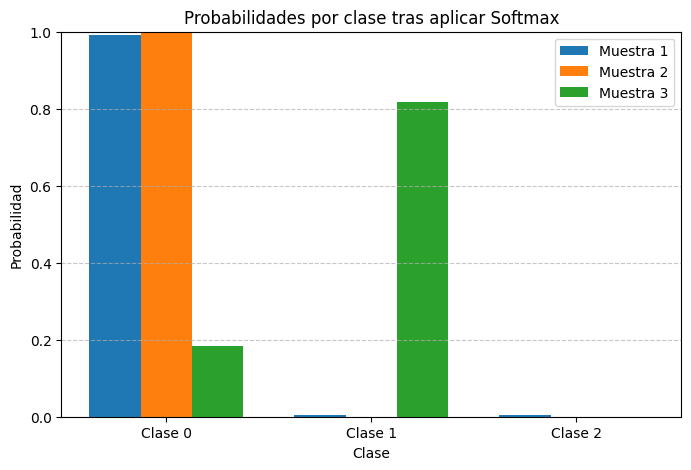

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Convertimos los tensores a CPU y NumPy para graficar
y_softmax_np = y_softmax.cpu().numpy()

# Número de muestras y clases
n_muestras, n_clases = y_softmax_np.shape

# Configuración del gráfico
plt.figure(figsize=(8, 5))

# Creamos un grupo de barras para cada muestra
indices = np.arange(n_clases)
ancho = 0.25

for i in range(n_muestras):
    plt.bar(indices + i * ancho, y_softmax_np[i], width=ancho, label=f"Muestra {i+1}")

plt.title("Probabilidades por clase tras aplicar Softmax")
plt.xlabel("Clase")
plt.ylabel("Probabilidad")
plt.xticks(indices + ancho, [f"Clase {j}" for j in range(n_clases)])
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# === Derivada (Jacobiana) de Softmax para una muestra ===
#La derivada no es sencilla porque cada salida depende de todas las entradas.
#Mide cómo cambia cada probabilidad con respecto a cada salida del perceptrón
import torch

# Tomamos la primera muestra
s = y_softmax[0]  # vector de probabilidades de una muestra (3 clases)

# Construimos la matriz jacobiana
jacobian = torch.diag(s) - torch.outer(s, s)

print("Probabilidades (s):\n", s)
print("\nJacobiana de Softmax (∂s_i/∂y_j):\n", jacobian)
print("\nSuma por filas (debería ser ≈ 0):", jacobian.sum(dim=1))


Probabilidades (s):
 tensor([0.9919, 0.0041, 0.0041], device='cuda:0')

Jacobiana de Softmax (∂s_i/∂y_j):
 tensor([[ 8.0414e-03, -4.0208e-03, -4.0208e-03],
        [-4.0208e-03,  4.0372e-03, -1.6432e-05],
        [-4.0208e-03, -1.6432e-05,  4.0372e-03]], device='cuda:0')

Suma por filas (debería ser ≈ 0): tensor([-1.0990e-07,  0.0000e+00, -2.0191e-10], device='cuda:0')
